<a href="https://colab.research.google.com/github/sathyadithyarithi/ITI103_myClasswork/blob/main/session-1/using_pretrained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Pretrained CNN models

Welcome to this week's programming exercise. We have covered many different Convolutional Neural Network architectures such as VGG, ResNet, Inception and MobileNet. It is time to see them in action.

At the end of this exercise, you will be able to:
- load pretrained models of some popular Convolutional Neural Networks and use them to classify images
- identify some of the architecture patterns in the popular Convolutional Neural Network
- compare the inference speed of different models


## Get the sample image

We will use the pretrained model to classify a sample image (a picture of table and chair). Let's go ahead and download the image.

In [3]:
# wget is a linux command available on linux os like Ubuntu
!wget https://nyp-aicourse.s3.ap-southeast-1.amazonaws.com/iti107/resources/chair_table.png

--2024-11-18 12:44:43--  https://nyp-aicourse.s3.ap-southeast-1.amazonaws.com/iti107/resources/chair_table.png
Resolving nyp-aicourse.s3.ap-southeast-1.amazonaws.com (nyp-aicourse.s3.ap-southeast-1.amazonaws.com)... 52.219.40.255, 3.5.149.118, 52.219.129.118, ...
Connecting to nyp-aicourse.s3.ap-southeast-1.amazonaws.com (nyp-aicourse.s3.ap-southeast-1.amazonaws.com)|52.219.40.255|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 126926 (124K) [image/png]
Saving to: ‘chair_table.png.1’

chair_table.png.1   100%[===================>] 123.95K   249KB/s    in 0.5s    

2024-11-18 12:44:45 (249 KB/s) - ‘chair_table.png.1’ saved [126926/126926]



In [2]:
from PIL import Image
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt

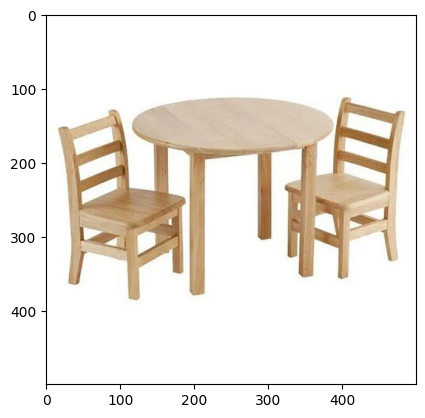

In [4]:
# Read Images
img_path = 'chair_table.png'
img = keras.utils.load_img(img_path)

# display Images
plt.imshow(img)

## VGG16 - Pretrained Model

In [6]:
from keras.applications import vgg16

vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

***Questions***

1. What is the expected input image size?
2. What are the last four layers in VGG-16?

<details><summary>Click here for answer</summary>
    
1. it is expected to have a height of 224 and width of 224
2. the last 4 layers are flatten (which flattens the 2-D array into 1-D array before feeding to FC layer), and 2 Fully-connected (Dense) layers, and the last layer is a soft-max layer to classify 1000-classes. This is quite typical of a image classifier.

</details>

In [9]:
# Utility Function to Load Image, Preprocess input and Targets
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224,224)):
    img = keras.utils.load_img(img_path, target_size=target_size)
    x = keras.utils.img_to_array(img)
    x = keras.ops.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [10]:
# Predict Results
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


,Predicted Class,Name,Probability
0,n03201208,dining_table,0.988334
1,n03179701,desk,0.004743
2,n03376595,folding_chair,0.001707
3,n04081281,restaurant,0.000965
4,n03018349,china_cabinet,0.000869
5,n04099969,rocking_chair,0.000658
6,n04344873,studio_couch,0.000358
7,n03903868,pedestal,0.000250
8,n03899768,patio,0.000222
9,n03661043,library,0.000105


Notice that we pass in `vgg.preprocess_input` function to preprocess the image before calling `model.predict()`. Different network (e.g. VGG, ResNet, etc) expects the input image to be normalized in different ways, and different models will provide their own preprocess_input() function to perform the normalization.

We also call `keras.ops.expand_dims(x, axis=0)` before calling `preprocess_input()` and `predict()`.

***Question***

1. What does `keras.ops.expand_dims(x, axis=0)` do and why do we need it?
2. Our sample picture consists of both table and chair? What does VGG16 predict? and why do you think it predicts so?
3. Of the top 10 predictions, did you see any prediction about chair?


<details><summary>Click here for answer</summary>

1. `keras.ops.expand_dims()` increases the number of dimensions and the axis of the new dimension is specified by the axis parameter. In this case, we add in a new axis as axis=0, first axis. This is because the `preprocess_input()` and `predict()` function expects the images to be in the shape `(samples, height, width, channels)`, the 1st axis being the batch.

2. It predicts dining table. It probably focus on the object in the middle of the image.

3. Yes, folder chair is one of the top 10 predictions.

</details>

## Resnet50 - Pretrained Model

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.863494 to fit



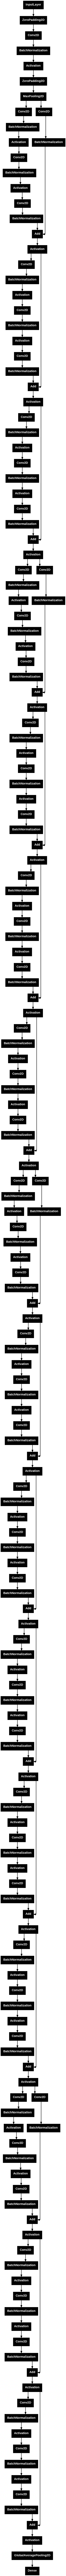

In [11]:
# It will download the weights that might take a while
# Also, the summary will be quite long, since Resnet50 is a much larger network than VGG16
from keras.applications import resnet50

resnet50_model = resnet50.ResNet50(weights='imagenet')

# let's plot the model, instead of using model.summary(), as it is easier to see some of the skip connections
keras.utils.plot_model(resnet50_model, to_file="resnet.png")

***Questions***

1. Can you identify the skip connection block from the model plot()?
2. Look at the last few layers in the ResNet. How are they different from those of VGG-16?

<details><summary>Click here for answer</summary>
    
1. Look for those 'Add' layer (e.g. layer with name add_2). The Add layer adds the skip connection with the previous layer. Notice that the add is done before the Activation function. You can also call plot_model() to get a graphical visualization of the model.

2. ResNet does not use make use of Full-connected layers as classification layers. Instead it replaces the FC layers with GlobalAveragePooling2D. This architecture is very common in more modern architectures.

</details>

In [12]:
# Predict Results
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


,Predicted Class,Name,Probability
0,n03201208,dining_table,0.981002
1,n03376595,folding_chair,0.007545
2,n03179701,desk,0.001955
3,n03903868,pedestal,0.001811
4,n03018349,china_cabinet,0.001110
5,n03899768,patio,0.000919
6,n03337140,file,0.000576
7,n04429376,throne,0.000387
8,n04344873,studio_couch,0.000369
9,n03661043,library,0.000269


## MobileNet v2 - Pretrained Model

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.935612 to fit



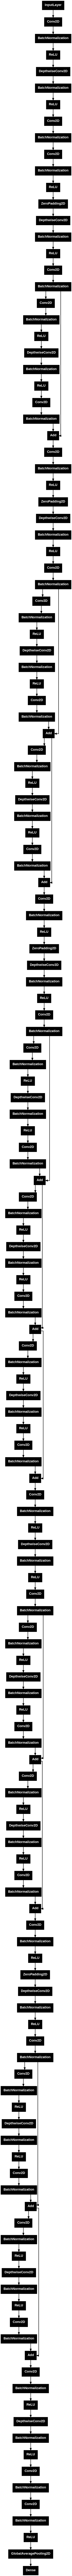

In [13]:
from keras.applications import mobilenet_v2
mobilenet_v2_model = mobilenet_v2.MobileNetV2(weights='imagenet')

# print the model summary
keras.utils.plot_model(mobilenet_v2_model, to_file='mobilenet_v2.png')

***Questions***

1. Can you identify the Depth-wise Convolution layer from the model summary?

<details><summary>Click here for answer</summary>

1. For example, the layer called 'block_1_depthwise'.

    
</details>

In [14]:
predict_image(mobilenet_v2_model, img_path, mobilenet_v2.preprocess_input, mobilenet_v2.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


,Predicted Class,Name,Probability
0,n03201208,dining_table,0.542045
1,n03376595,folding_chair,0.059957
2,n04099969,rocking_chair,0.017855
3,n03903868,pedestal,0.009702
4,n04081281,restaurant,0.007887
5,n03899768,patio,0.005077
6,n03891251,park_bench,0.003682
7,n09332890,lakeside,0.003177
8,n03179701,desk,0.003165
9,n03532672,hook,0.003056


### Speed comparison

We compare the inference speed of the three different models. Which one has the fastest inference speed?

In [22]:
img = keras.utils.load_img(img_path, target_size=(224,224))
img_arr = keras.utils.img_to_array(img)
img_arr = keras.ops.expand_dims(img_arr, axis=0)

# duplicate the image 128 times so that we can see significant differences between different models
images = keras.ops.repeat(img_arr, repeats=[128], axis=0)

In [16]:
processed_image = vgg16.preprocess_input(images)


In [17]:
%%timeit -n 1 -r 1
vgg16_model.predict(processed_image)

4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 119ms/step
20.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [18]:
processed_image = resnet50.preprocess_input(images)

In [19]:
%%timeit -n 1 -r 1
resnet50_model.predict(processed_image)

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step
10.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [20]:
processed_image = mobilenet_v2.preprocess_input(images)

In [21]:
%%timeit -n 1 -r 1
mobilenet_v2_model.predict(processed_image)

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step
5.51 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
